In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

fake_df = pd.read_csv('data/Fake.csv')
real_df = pd.read_csv('data/True.csv')

fake_df['label'] = 0
real_df['label'] = 1

df = pd.concat([fake_df, real_df], ignore_index=True)
df = df.sample(frac = 1).reset_index(drop=True)

print("Dataset loaded successfully!")
print(f"Total samples: {len(df)}")

Dataset loaded successfully!
Total samples: 44898


Null values per column:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


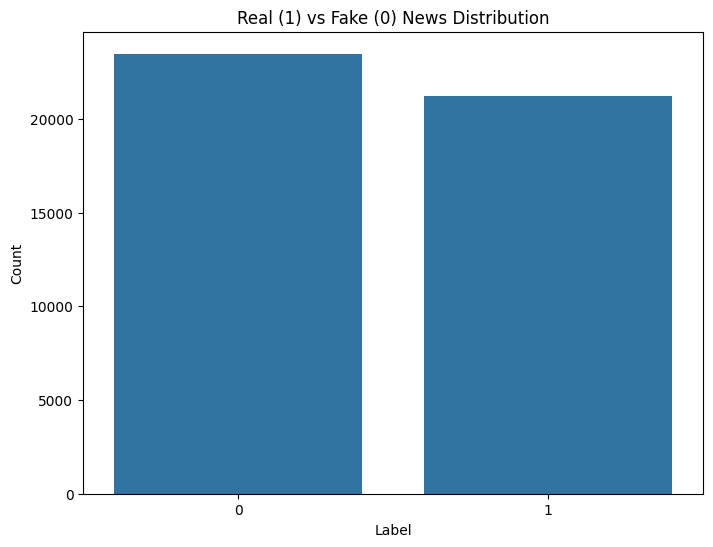

Dataset shape after removing duplicates: (44689, 5)


In [8]:
df.drop_duplicates(inplace=True)

print("Null values per column:")
print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Real (1) vs Fake (0) News Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

print(f"Dataset shape after removing duplicates: {df.shape}")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], 
    test_size=0.2, random_state=42,
    stratify=df['label']
)

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Training set shape: {X_train_tfidf.shape}")
print(f"Test set shape: {X_test_tfidf.shape}")

Training set shape: (35751, 111614)
Test set shape: (8938, 111614)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

Confusion Matrix:
[[4616   80]
 [  67 4175]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4696
           1       0.98      0.98      0.98      4242

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938


Accuracy: 0.9836


In [11]:
import joblib
import pickle

os.makedirs("model", exist_ok=True)

try:
    # Save using joblib
    joblib.dump(model, 'model/model.pkl')
    joblib.dump(tfidf, 'model/vectorizer.pkl')
    print("Models saved successfully with joblib!")
    
    # Also save using pickle as backup
    with open('model/model_backup.pkl', 'wb') as f:
        pickle.dump(model, f)
    with open('model/vectorizer_backup.pkl', 'wb') as f:
        pickle.dump(tfidf, f)
    print("Backup models saved with pickle!")
    
except Exception as e:
    print(f"Error saving models: {e}")

# Test loading the saved models
try:
    loaded_model = joblib.load('model/model.pkl')
    loaded_vectorizer = joblib.load('model/vectorizer.pkl')
    print("Models loaded successfully!")
    
    # Quick test
    test_text = ["This is a test news article"]
    test_vector = loaded_vectorizer.transform(test_text)
    prediction = loaded_model.predict(test_vector)
    print(f"Test prediction: {prediction[0]} ({'Real' if prediction[0] == 1 else 'Fake'})")
    
except Exception as e:
    print(f"Error loading models: {e}")


Models saved successfully with joblib!
Backup models saved with pickle!
Models loaded successfully!
Test prediction: 0 (Fake)
